# 항공사 데이터_회귀분석_LightGBM_FeatureImportance_SHAP

In [1]:
import pandas as pd
import numpy as np

# =========================
# 항공사 데이터 로드 (날씨 데이터 제거 버전)
# =========================
df = pd.read_csv("new_flight_analysis_summary.csv", encoding="utf-8-sig")

# =========================
# 회귀 타깃 (지연 시간)
# =========================
df = df[df["지연_분"].notna()].copy()

print("✅ 회귀 대상 데이터 수:", len(df))

# =========================
# 변수 정의
# =========================
num_cols = [
    "dep_hour",
    "dep_min",        # ✅ CSV 기준으로 통일
    "dep_weekday",
    "is_weekend"
]

cat_cols = [
    "항공사",
    "출발지",
    "arrival_code",
    "flight_type"
]

X = df[num_cols + cat_cols]
y = df["지연_분"]


✅ 회귀 대상 데이터 수: 2836872


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 2269497, number of used features: 8
[LightGBM] [Info] Start training from score 24.460704


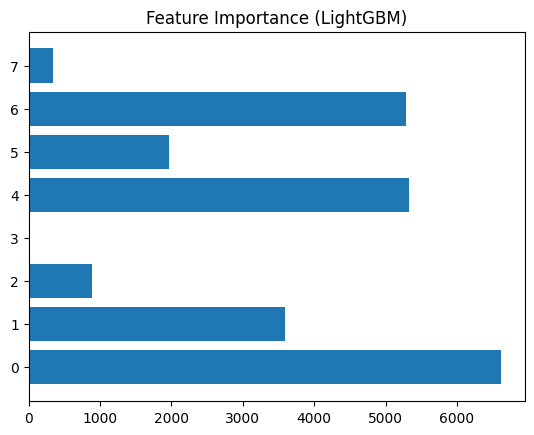

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


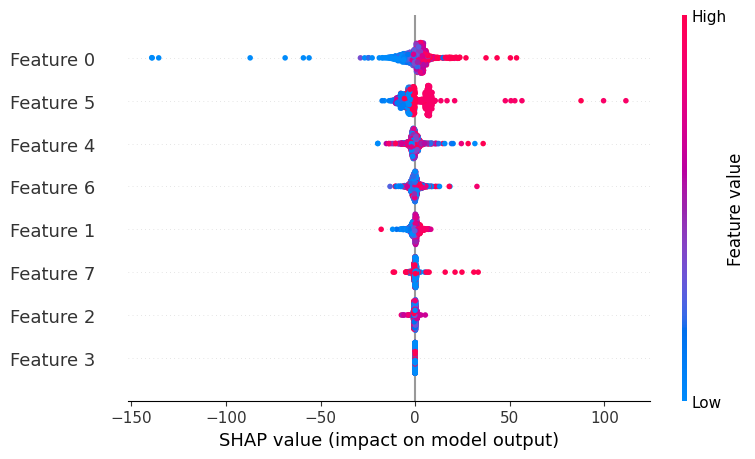

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMRegressor
import shap
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

prep = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_cols)
])

Xtr = prep.fit_transform(X_train)

model = LGBMRegressor(n_estimators=800, random_state=42)
model.fit(Xtr, y_train)

# Feature Importance
importances = model.feature_importances_
plt.barh(range(len(importances)), importances)
plt.title("Feature Importance (LightGBM)")
plt.show()

# SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xtr[:1000])
shap.summary_plot(shap_values, Xtr[:1000])
